# Importing all libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.gridspec as gridspec


# 1. FFT of Pseudo Random Numbers

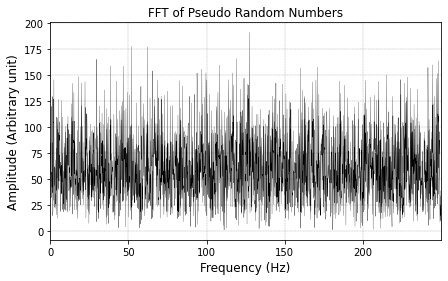

In [8]:
"""
Using Nyquist Sampling theorem
"""


time = np.linspace(0, 10, 5000)  # Time values from 0 to 10 with 5000 points
value = np.random.randn(5000)  # Random values simulating noise

# Compute the Fourier transform
fft_result = np.fft.fft(value)

# Compute the frequencies corresponding to the Fourier transform
# The frequency range is from -Nyquist frequency to +Nyquist frequency
delta_t = time[1] - time[0]  # Time interval between samples
nyquist_freq = 0.5 / delta_t  # Nyquist frequency
frequencies = np.fft.fftfreq(len(time), delta_t)

# Get the indices where the frequencies are positive
positive_frequencies = frequencies > 0

# Plot the Fourier transform for positive frequencies only
plt.figure(figsize=(7, 4))
plt.plot(frequencies[positive_frequencies], np.abs(fft_result)[positive_frequencies], linewidth=0.25, color = 'black')
plt.title('FFT of Pseudo Random Numbers', fontsize = 12)
plt.xlabel('Frequency (Hz)', fontsize = 12)
plt.ylabel('Amplitude (Arbitrary unit)', fontsize = 12)
plt.grid(True, linestyle='--', linewidth=0.3, color='gray')
plt.xlim([0, nyquist_freq])  # Limit x-axis to Nyquist frequency

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/FFT/FTT_PRNG.png')

plt.show()


# 2. FFT of BJT based noise generator

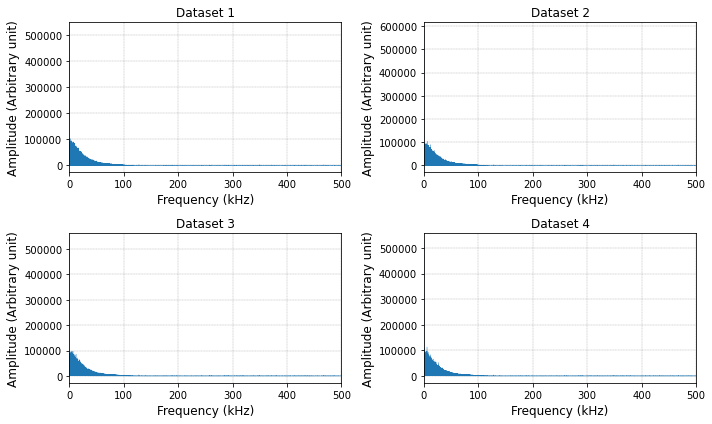

In [9]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data = data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'})
    return data['Time'], data['Value']

# Function to compute FFT and return positive frequencies and their magnitudes
def compute_fft(value, sampling_rate):
    fft_result = np.fft.fft(value)
    delta_t = 1 / sampling_rate
    frequencies = np.fft.fftfreq(len(fft_result), delta_t) * 1e-3
    nyquist_freq = sampling_rate / 2
    positive_frequencies = frequencies[:len(frequencies)//2]
    fft_magnitude = np.abs(fft_result)[:len(frequencies)//2]
    return positive_frequencies, fft_magnitude, nyquist_freq * 1e-3

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/B1_100kHz_lowpassfilter/1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B1_100kHz_lowpassfilter/2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B1_100kHz_lowpassfilter/3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B1_100kHz_lowpassfilter/4.csv"
]

# Plotting all datasets in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

for i, ax in enumerate(axs.flat):
    time, value = load_and_process(filepaths[i])
    frequencies, magnitude, nyquist_khz = compute_fft(value, 1e6)
    ax.plot(frequencies, magnitude, linewidth=0.25)
    ax.set_title(f'Dataset {i+1}', fontsize = 12)
    ax.set_xlabel('Frequency (kHz)', fontsize = 12)
    ax.set_ylabel('Amplitude (Arbitrary unit)', fontsize = 12)
    ax.grid(True, linestyle='--', linewidth=0.3, color='gray')
    ax.set_xlim([0, nyquist_khz])

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/FFT/FTT_BJT_LP.png')
plt.show()


In [1]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data = data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'})
    return data['Time'], data['Value']

# Function to compute FFT and return positive frequencies and their magnitudes
def compute_fft(value, sampling_rate):
    fft_result = np.fft.fft(value)
    delta_t = 1 / sampling_rate
    frequencies = np.fft.fftfreq(len(fft_result), delta_t) * 1e-3
    nyquist_freq = sampling_rate / 2
    positive_frequencies = frequencies[:len(frequencies)//2]
    fft_magnitude = np.abs(fft_result)[:len(frequencies)//2]
    return positive_frequencies, fft_magnitude, nyquist_freq * 1e-3

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/B1_100kHz_lowpassfilter/1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B1_100kHz_lowpassfilter/2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B1_100kHz_lowpassfilter/3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B1_100kHz_lowpassfilter/4.csv"
]

# Initialize a DataFrame to store the numerical parameters
parameters_df = pd.DataFrame(columns=['Dataset', 'Nyquist Frequency (kHz)', 'Frequency Resolution (kHz)', 'Max Amplitude', 'Dynamic Range'])

# Compute FFT for each dataset and store the parameters
for i, filepath in enumerate(filepaths):
    time, value = load_and_process(filepath)
    sampling_rate = 1e6  # Sampling rate in Hz
    frequencies, magnitude, nyquist_khz = compute_fft(value, sampling_rate)
    frequency_resolution = frequencies[1] - frequencies[0]
    max_amplitude = np.max(magnitude)
    dynamic_range = max_amplitude - np.min(magnitude)
    
    # Add the results to the DataFrame
    parameters_df = parameters_df.append({
        'Dataset': i + 1,
        'Nyquist Frequency (kHz)': nyquist_khz,
        'Frequency Resolution (kHz)': frequency_resolution,
        'Max Amplitude': max_amplitude,
        'Dynamic Range': dynamic_range
    }, ignore_index=True)

# Print and save the DataFrame
print(parameters_df)
#parameters_df.to_csv('/Users/goldenswan/Desktop/Thesis/Data/FFT_Parameters.csv', index=False)


/var/folders/9l/x4gnkpt560z7b09mhyy5chvw0000gn/T/ipykernel_12694/2077375714.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  parameters_df = parameters_df.append({
/var/folders/9l/x4gnkpt560z7b09mhyy5chvw0000gn/T/ipykernel_12694/2077375714.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  parameters_df = parameters_df.append({
/var/folders/9l/x4gnkpt560z7b09mhyy5chvw0000gn/T/ipykernel_12694/2077375714.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  parameters_df = parameters_df.append({


  Dataset Nyquist Frequency (kHz) Frequency Resolution (kHz) Max Amplitude  \
0     1.0                   500.0                     0.0001     523955.12   
1     2.0                   500.0                     0.0001     587312.64   
2     3.0                   500.0                     0.0001      536489.2   
3     4.0                   500.0                     0.0001      532263.2   

   Dynamic Range  
0   523955.09119  
1  587312.619679  
2  536489.127133  
3  532263.155982  


/var/folders/9l/x4gnkpt560z7b09mhyy5chvw0000gn/T/ipykernel_12694/2077375714.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  parameters_df = parameters_df.append({


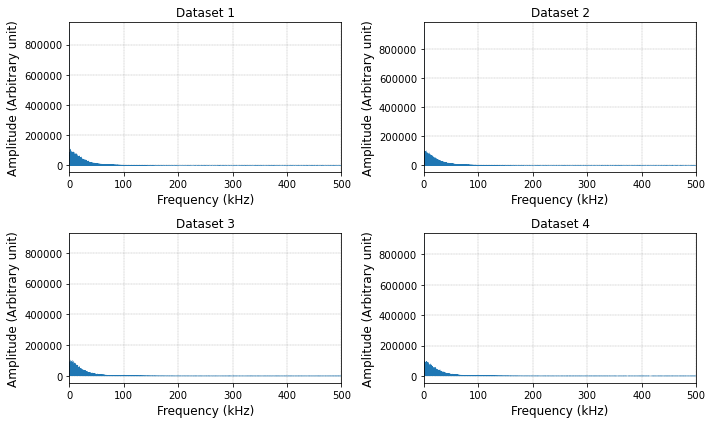

In [10]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data = data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'})
    return data['Time'], data['Value']

# Function to compute FFT and return positive frequencies and their magnitudes
def compute_fft(value, sampling_rate):
    fft_result = np.fft.fft(value)
    delta_t = 1 / sampling_rate
    frequencies = np.fft.fftfreq(len(fft_result), delta_t) * 1e-3
    nyquist_freq = sampling_rate / 2
    positive_frequencies = frequencies[:len(frequencies)//2]
    fft_magnitude = np.abs(fft_result)[:len(frequencies)//2]
    return positive_frequencies, fft_magnitude, nyquist_freq * 1e-3

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/B1_no_lowpassfilter/1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B1_no_lowpassfilter/2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B1_no_lowpassfilter/3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B1_no_lowpassfilter/4.csv"
]

# Plotting all datasets in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

for i, ax in enumerate(axs.flat):
    time, value = load_and_process(filepaths[i])
    frequencies, magnitude, nyquist_khz = compute_fft(value, 1e6)
    ax.plot(frequencies, magnitude, linewidth=0.25)
    ax.set_title(f'Dataset {i+1}', fontsize = 12)
    ax.set_xlabel('Frequency (kHz)', fontsize = 12)
    ax.set_ylabel('Amplitude (Arbitrary unit)', fontsize = 12)
    ax.grid(True, linestyle='--', linewidth=0.3, color='gray')
    ax.set_xlim([0, nyquist_khz])

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/FFT/FTT_BJT_no_LP.png')
plt.show()


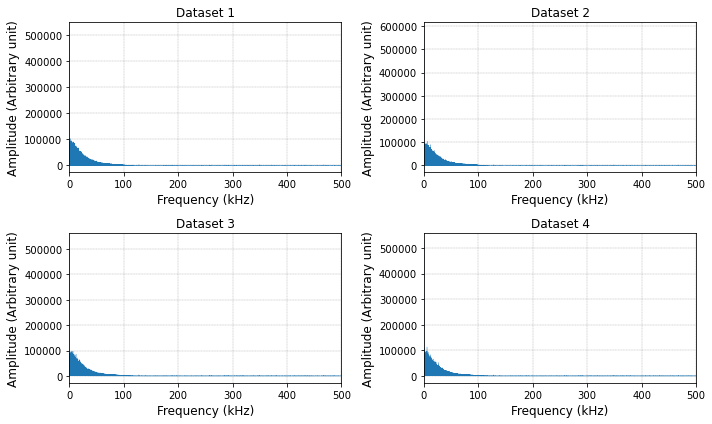

In [11]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data = data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'})
    return data['Time'], data['Value']

# Function to compute FFT and return positive frequencies and their magnitudes
def compute_fft(value, sampling_rate):
    fft_result = np.fft.fft(value)
    delta_t = 1 / sampling_rate
    frequencies = np.fft.fftfreq(len(fft_result), delta_t) * 1e-3
    nyquist_freq = sampling_rate / 2
    positive_frequencies = frequencies[:len(frequencies)//2]
    fft_magnitude = np.abs(fft_result)[:len(frequencies)//2]
    return positive_frequencies, fft_magnitude, nyquist_freq * 1e-3

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/B2_lowpass/1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B2_lowpass/2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B2_lowpass/3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B2_lowpass/4.csv"
]

# Plotting all datasets in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

for i, ax in enumerate(axs.flat):
    time, value = load_and_process(filepaths[i])
    frequencies, magnitude, nyquist_khz = compute_fft(value, 1e6)
    ax.plot(frequencies, magnitude, linewidth=0.25)
    ax.set_title(f'Dataset {i+1}', fontsize = 12)
    ax.set_xlabel('Frequency (kHz)', fontsize = 12)
    ax.set_ylabel('Amplitude (Arbitrary unit)', fontsize = 12)
    ax.grid(True, linestyle='--', linewidth=0.3, color='gray')
    ax.set_xlim([0, nyquist_khz])

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/FFT/FTT_BJT2_LP.png')
plt.show()


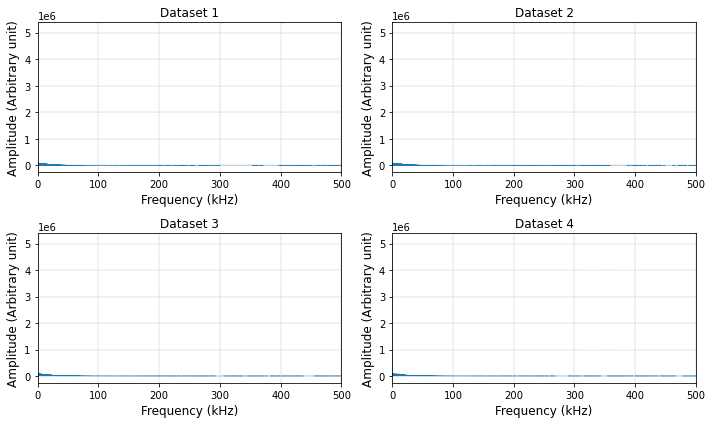

In [12]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data = data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'})
    return data['Time'], data['Value']

# Function to compute FFT and return positive frequencies and their magnitudes
def compute_fft(value, sampling_rate):
    fft_result = np.fft.fft(value)
    delta_t = 1 / sampling_rate
    frequencies = np.fft.fftfreq(len(fft_result), delta_t) * 1e-3
    nyquist_freq = sampling_rate / 2
    positive_frequencies = frequencies[:len(frequencies)//2]
    fft_magnitude = np.abs(fft_result)[:len(frequencies)//2]
    return positive_frequencies, fft_magnitude, nyquist_freq * 1e-3

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/B2_no_lowpass/1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B2_no_lowpass/2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B2_no_lowpass/3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/B2_no_lowpass/4.csv"
]

# Plotting all datasets in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

for i, ax in enumerate(axs.flat):
    time, value = load_and_process(filepaths[i])
    frequencies, magnitude, nyquist_khz = compute_fft(value, 1e6)
    ax.plot(frequencies, magnitude, linewidth=0.25)
    ax.set_title(f'Dataset {i+1}', fontsize = 12)
    ax.set_xlabel('Frequency (kHz)', fontsize = 12)
    ax.set_ylabel('Amplitude (Arbitrary unit)', fontsize = 12)
    ax.grid(True, linestyle='--', linewidth=0.3, color='gray')
    ax.set_xlim([0, nyquist_khz])

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/FFT/FTT_BJT2_no_LP.png')
plt.show()


# 3. FFT of HP 3722-A

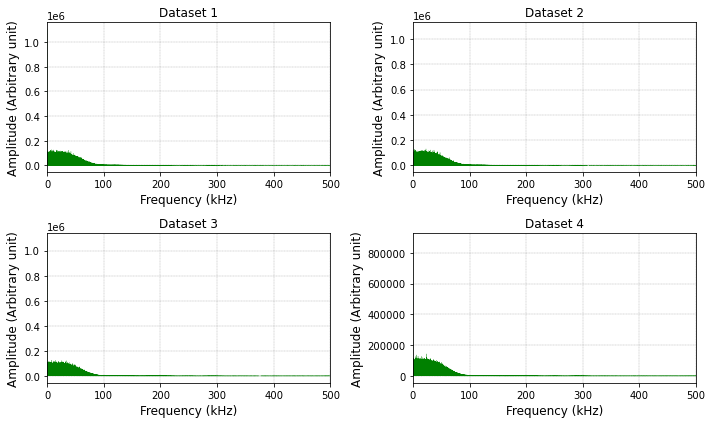

In [13]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data = data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'})
    return data['Time'], data['Value']

# Function to compute FFT and return positive frequencies and their magnitudes
def compute_fft(value, sampling_rate):
    fft_result = np.fft.fft(value)
    delta_t = 1 / sampling_rate
    frequencies = np.fft.fftfreq(len(fft_result), delta_t) * 1e-3
    nyquist_freq = sampling_rate / 2
    positive_frequencies = frequencies[:len(frequencies)//2]
    fft_magnitude = np.abs(fft_result)[:len(frequencies)//2]
    return positive_frequencies, fft_magnitude, nyquist_freq * 1e-3

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/HP/noise_50kHz_1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/HP/noise_50kHz_2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/HP/noise_50kHz_3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/HP/noise_50kHz_4.csv"
]

# Plotting all datasets in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

for i, ax in enumerate(axs.flat):
    time, value = load_and_process(filepaths[i])
    frequencies, magnitude, nyquist_khz = compute_fft(value, 1e6)
    ax.plot(frequencies, magnitude, linewidth=0.25, color = "green")
    ax.set_title(f'Dataset {i+1}', fontsize = 12)
    ax.set_xlabel('Frequency (kHz)', fontsize = 12)
    ax.set_ylabel('Amplitude (Arbitrary unit)', fontsize = 12)
    ax.grid(True, linestyle='--', linewidth=0.3, color='gray')
    ax.set_xlim([0, nyquist_khz])

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/FFT/FTT_HP_50kHz.png')
plt.show()


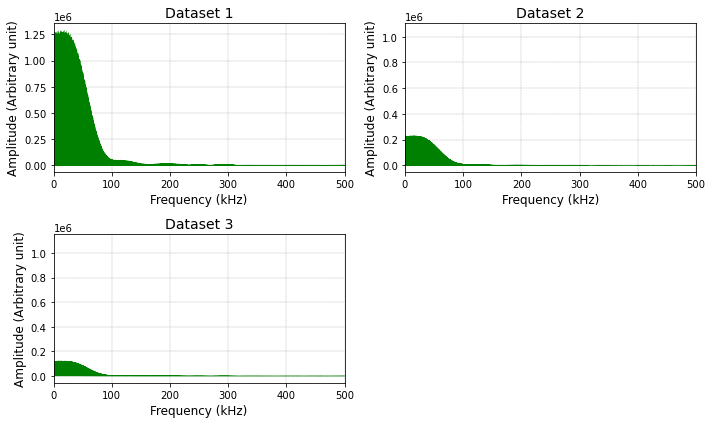

In [14]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data = data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'})
    return data['Time'], data['Value']

# Function to compute FFT and return positive frequencies and their magnitudes
def compute_fft(value, sampling_rate):
    fft_result = np.fft.fft(value)
    delta_t = 1 / sampling_rate
    frequencies = np.fft.fftfreq(len(fft_result), delta_t) * 1e-3
    nyquist_freq = sampling_rate / 2
    positive_frequencies = frequencies[:len(frequencies)//2]
    fft_magnitude = np.abs(fft_result)[:len(frequencies)//2]
    return positive_frequencies, fft_magnitude, nyquist_freq * 1e-3

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/HP/pseudo_random_50kHz_seqlen_8191_1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/HP/pseudo_random_50kHz_seqlen_262143_1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/HP/pseudo_random_50kHz_seqlen_1048575_1.csv",
]


# Create a figure with a gridspec defined for a 2x2 grid
fig = plt.figure(figsize=(10, 6))  # Adjust figsize to fit your screen appropriately
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

# Use the first row, first column for the first plot
ax1 = plt.subplot(gs[0, 0])
time, value = load_and_process(filepaths[0])
frequencies, magnitude, nyquist_khz = compute_fft(value, 1e6)
ax1.plot(frequencies, magnitude, linewidth=0.25, color="green")
ax1.set_title(f'Dataset 1', fontsize=14)
ax1.set_xlabel('Frequency (kHz)', fontsize=12)
ax1.set_ylabel('Amplitude (Arbitrary unit)', fontsize=12)
ax1.grid(True, linestyle='--', linewidth=0.3, color='gray')
ax1.set_xlim([0, nyquist_khz])

# Use the first row, second column for the second plot
ax2 = plt.subplot(gs[0, 1])
time, value = load_and_process(filepaths[1])
frequencies, magnitude, nyquist_khz = compute_fft(value, 1e6)
ax2.plot(frequencies, magnitude, linewidth=0.25, color="green")
ax2.set_title(f'Dataset 2', fontsize=14)
ax2.set_xlabel('Frequency (kHz)', fontsize=12)
ax2.set_ylabel('Amplitude (Arbitrary unit)', fontsize=12)
ax2.grid(True, linestyle='--', linewidth=0.3, color='gray')
ax2.set_xlim([0, nyquist_khz])

# Use the second row, spanning both columns for the third plot
ax3 = plt.subplot(gs[1, 0])
time, value = load_and_process(filepaths[2])
frequencies, magnitude, nyquist_khz = compute_fft(value, 1e6)
ax3.plot(frequencies, magnitude, linewidth=0.25, color="green")
ax3.set_title(f'Dataset 3', fontsize=14)
ax3.set_xlabel('Frequency (kHz)', fontsize=12)
ax3.set_ylabel('Amplitude (Arbitrary unit)', fontsize=12)
ax3.grid(True, linestyle='--', linewidth=0.3, color='gray')
ax3.set_xlim([0, nyquist_khz])

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/FFT/FTT_HP_PRNG.png')
plt.show()

# FFT of Wandel and Goltermann RG-1

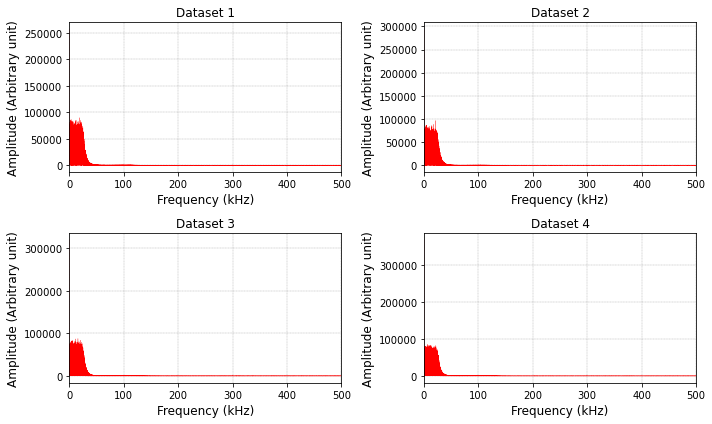

In [15]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data = data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'})
    return data['Time'], data['Value']

# Function to compute FFT and return positive frequencies and their magnitudes
def compute_fft(value, sampling_rate):
    fft_result = np.fft.fft(value)
    delta_t = 1 / sampling_rate
    frequencies = np.fft.fftfreq(len(fft_result), delta_t) * 1e-3
    nyquist_freq = sampling_rate / 2
    positive_frequencies = frequencies[:len(frequencies)//2]
    fft_magnitude = np.abs(fft_result)[:len(frequencies)//2]
    return positive_frequencies, fft_magnitude, nyquist_freq * 1e-3

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_16Hz_22kHz_1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_16Hz_22kHz_2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_16Hz_22kHz_3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_16Hz_22kHz_4.csv"
]

# Plotting all datasets in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

for i, ax in enumerate(axs.flat):
    time, value = load_and_process(filepaths[i])
    frequencies, magnitude, nyquist_khz = compute_fft(value, 1e6)
    ax.plot(frequencies, magnitude, linewidth=0.25, color = "red")
    ax.set_title(f'Dataset {i+1}', fontsize = 12)
    ax.set_xlabel('Frequency (kHz)', fontsize = 12)
    ax.set_ylabel('Amplitude (Arbitrary unit)', fontsize = 12)
    ax.grid(True, linestyle='--', linewidth=0.3, color='gray')
    ax.set_xlim([0, nyquist_khz])

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/FFT/WG_16.png')
plt.show()


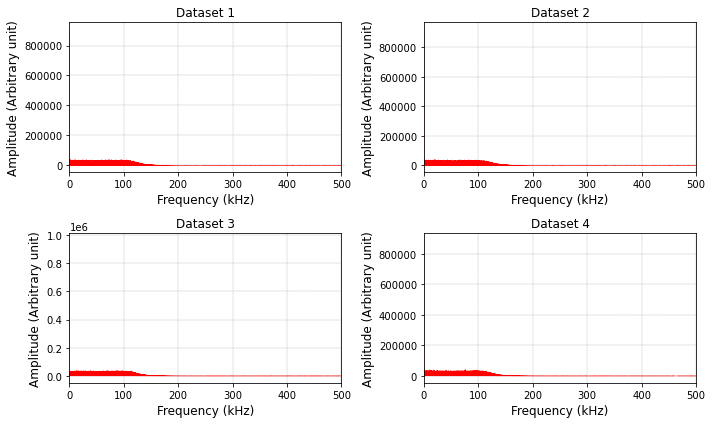

In [16]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data = data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'})
    return data['Time'], data['Value']

# Function to compute FFT and return positive frequencies and their magnitudes
def compute_fft(value, sampling_rate):
    fft_result = np.fft.fft(value)
    delta_t = 1 / sampling_rate
    frequencies = np.fft.fftfreq(len(fft_result), delta_t) * 1e-3
    nyquist_freq = sampling_rate / 2
    positive_frequencies = frequencies[:len(frequencies)//2]
    fft_magnitude = np.abs(fft_result)[:len(frequencies)//2]
    return positive_frequencies, fft_magnitude, nyquist_freq * 1e-3

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_100kHz_1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_100kHz_2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_100kHz_3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_100kHz_4.csv"
]

# Plotting all datasets in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

for i, ax in enumerate(axs.flat):
    time, value = load_and_process(filepaths[i])
    frequencies, magnitude, nyquist_khz = compute_fft(value, 1e6)
    ax.plot(frequencies, magnitude, linewidth=0.25, color = "red")
    ax.set_title(f'Dataset {i+1}', fontsize = 12)
    ax.set_xlabel('Frequency (kHz)', fontsize = 12)
    ax.set_ylabel('Amplitude (Arbitrary unit)', fontsize = 12)
    ax.grid(True, linestyle='--', linewidth=0.3, color='gray')
    ax.set_xlim([0, nyquist_khz])

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/FFT/WG_100.png')
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data = data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'})
    return data['Time'], data['Value']

# Function to compute FFT and return positive frequencies and their magnitudes
def compute_fft(value, sampling_rate):
    fft_result = np.fft.fft(value)
    delta_t = 1 / sampling_rate
    frequencies = np.fft.fftfreq(len(fft_result), delta_t) * 1e-3
    nyquist_freq = sampling_rate / 2
    positive_frequencies = frequencies[:len(frequencies)//2]
    fft_magnitude = np.abs(fft_result)[:len(frequencies)//2]
    return positive_frequencies, fft_magnitude, nyquist_freq * 1e-3

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_100kHz_1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_100kHz_2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_100kHz_3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/WG/white_noise_100kHz_4.csv"
]

# Initialize a DataFrame to store the numerical parameters
parameters_df = pd.DataFrame(columns=['Dataset', 'Nyquist Frequency (kHz)', 'Frequency Resolution (kHz)', 'Max Amplitude', 'Dynamic Range'])

# Compute FFT for each dataset and store the parameters
for i, filepath in enumerate(filepaths):
    time, value = load_and_process(filepath)
    sampling_rate = 1e6  # Sampling rate in Hz
    frequencies, magnitude, nyquist_khz = compute_fft(value, sampling_rate)
    frequency_resolution = frequencies[1] - frequencies[0]
    max_amplitude = np.max(magnitude)
    dynamic_range = max_amplitude - np.min(magnitude)
    
    # Add the results to the DataFrame
    parameters_df = parameters_df.append({
        'Dataset': i + 1,
        'Nyquist Frequency (kHz)': nyquist_khz,
        'Frequency Resolution (kHz)': frequency_resolution,
        'Max Amplitude': max_amplitude,
        'Dynamic Range': dynamic_range
    }, ignore_index=True)

# Print and save the DataFrame
print(parameters_df)
#parameters_df.to_csv('/Users/goldenswan/Desktop/Thesis/Data/FFT_Parameters.csv', index=False)


/var/folders/9l/x4gnkpt560z7b09mhyy5chvw0000gn/T/ipykernel_12694/2115185132.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  parameters_df = parameters_df.append({
/var/folders/9l/x4gnkpt560z7b09mhyy5chvw0000gn/T/ipykernel_12694/2115185132.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  parameters_df = parameters_df.append({
/var/folders/9l/x4gnkpt560z7b09mhyy5chvw0000gn/T/ipykernel_12694/2115185132.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  parameters_df = parameters_df.append({


  Dataset Nyquist Frequency (kHz) Frequency Resolution (kHz) Max Amplitude  \
0     1.0                   500.0                     0.0001     908828.24   
1     2.0                   500.0                     0.0001     922615.12   
2     3.0                   500.0                     0.0001     964458.88   
3     4.0                   500.0                     0.0001     891133.04   

   Dynamic Range  
0  908828.225203  
1  922615.057376  
2  964458.839266  
3  891133.023851  


/var/folders/9l/x4gnkpt560z7b09mhyy5chvw0000gn/T/ipykernel_12694/2115185132.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  parameters_df = parameters_df.append({


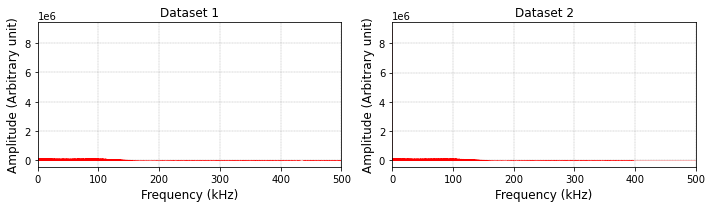

In [17]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data = data.rename(columns={'# TIME (us)': 'Time', 'CH1 (V)': 'Value'})
    return data['Time'], data['Value']

# Function to compute FFT and return positive frequencies and their magnitudes
def compute_fft(value, sampling_rate):
    fft_result = np.fft.fft(value)
    delta_t = 1 / sampling_rate
    frequencies = np.fft.fftfreq(len(fft_result), delta_t) * 1e-3
    nyquist_freq = sampling_rate / 2
    positive_frequencies = frequencies[:len(frequencies)//2]
    fft_magnitude = np.abs(fft_result)[:len(frequencies)//2]
    return positive_frequencies, fft_magnitude, nyquist_freq * 1e-3

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/WG_10bit/0000.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/WG_10bit/0001.csv"
]

# Plotting all datasets in a 2x2 grid
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

for i, ax in enumerate(axs.flat):
    time, value = load_and_process(filepaths[i])
    frequencies, magnitude, nyquist_khz = compute_fft(value, 1e6)
    ax.plot(frequencies, magnitude, linewidth=0.25, color = "red")
    ax.set_title(f'Dataset {i+1}', fontsize = 12)
    ax.set_xlabel('Frequency (kHz)', fontsize = 12)
    ax.set_ylabel('Amplitude (Arbitrary unit)', fontsize = 12)
    ax.grid(True, linestyle='--', linewidth=0.3, color='gray')
    ax.set_xlim([0, nyquist_khz])

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/FFT/WG_10bit.png')
plt.show()


# FFT of Zener based diodes

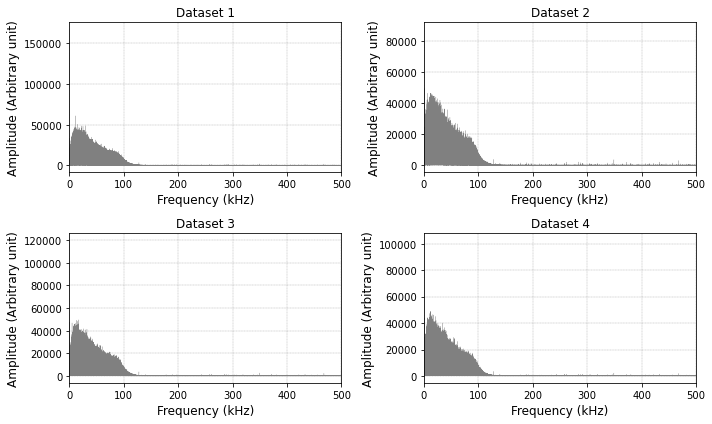

In [18]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data = data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'})
    return data['Time'], data['Value']

# Function to compute FFT and return positive frequencies and their magnitudes
def compute_fft(value, sampling_rate):
    fft_result = np.fft.fft(value)
    delta_t = 1 / sampling_rate
    frequencies = np.fft.fftfreq(len(fft_result), delta_t) * 1e-3
    nyquist_freq = sampling_rate / 2
    positive_frequencies = frequencies[:len(frequencies)//2]
    fft_magnitude = np.abs(fft_result)[:len(frequencies)//2]
    return positive_frequencies, fft_magnitude, nyquist_freq * 1e-3

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/Z1_100kHz_lowpassfilter/1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z1_100kHz_lowpassfilter/2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z1_100kHz_lowpassfilter/3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z1_100kHz_lowpassfilter/4.csv"
]

# Plotting all datasets in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

for i, ax in enumerate(axs.flat):
    time, value = load_and_process(filepaths[i])
    frequencies, magnitude, nyquist_khz = compute_fft(value, 1e6)
    ax.plot(frequencies, magnitude, linewidth=0.25, color = "grey")
    ax.set_title(f'Dataset {i+1}', fontsize = 12)
    ax.set_xlabel('Frequency (kHz)', fontsize = 12)
    ax.set_ylabel('Amplitude (Arbitrary unit)', fontsize = 12)
    ax.grid(True, linestyle='--', linewidth=0.3, color='gray')
    ax.set_xlim([0, nyquist_khz])

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/FFT/Z1_lp.png')
plt.show()


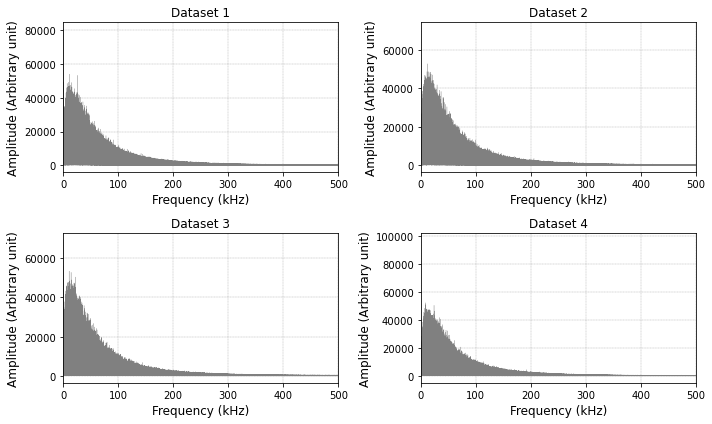

In [19]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data = data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'})
    return data['Time'], data['Value']

# Function to compute FFT and return positive frequencies and their magnitudes
def compute_fft(value, sampling_rate):
    fft_result = np.fft.fft(value)
    delta_t = 1 / sampling_rate
    frequencies = np.fft.fftfreq(len(fft_result), delta_t) * 1e-3
    nyquist_freq = sampling_rate / 2
    positive_frequencies = frequencies[:len(frequencies)//2]
    fft_magnitude = np.abs(fft_result)[:len(frequencies)//2]
    return positive_frequencies, fft_magnitude, nyquist_freq * 1e-3

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/Z1_no_lowpassfilter/1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z1_no_lowpassfilter/2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z1_no_lowpassfilter/3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z1_no_lowpassfilter/4.csv"
]

# Plotting all datasets in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

for i, ax in enumerate(axs.flat):
    time, value = load_and_process(filepaths[i])
    frequencies, magnitude, nyquist_khz = compute_fft(value, 1e6)
    ax.plot(frequencies, magnitude, linewidth=0.25, color = "grey")
    ax.set_title(f'Dataset {i+1}', fontsize = 12)
    ax.set_xlabel('Frequency (kHz)', fontsize = 12)
    ax.set_ylabel('Amplitude (Arbitrary unit)', fontsize = 12)
    ax.grid(True, linestyle='--', linewidth=0.3, color='gray')
    ax.set_xlim([0, nyquist_khz])

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/FFT/Z1_no_lp.png')
plt.show()


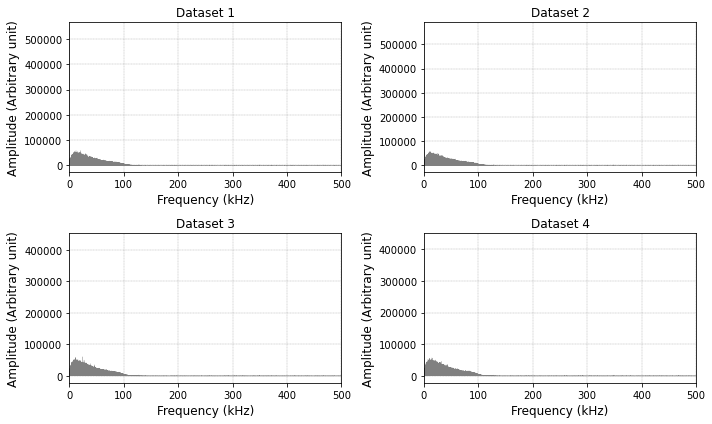

In [20]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data = data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'})
    return data['Time'], data['Value']

# Function to compute FFT and return positive frequencies and their magnitudes
def compute_fft(value, sampling_rate):
    fft_result = np.fft.fft(value)
    delta_t = 1 / sampling_rate
    frequencies = np.fft.fftfreq(len(fft_result), delta_t) * 1e-3
    nyquist_freq = sampling_rate / 2
    positive_frequencies = frequencies[:len(frequencies)//2]
    fft_magnitude = np.abs(fft_result)[:len(frequencies)//2]
    return positive_frequencies, fft_magnitude, nyquist_freq * 1e-3

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/Z2_100kHz_lowpassfilter/1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z2_100kHz_lowpassfilter/2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z2_100kHz_lowpassfilter/3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z2_100kHz_lowpassfilter/4.csv"
]

# Plotting all datasets in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

for i, ax in enumerate(axs.flat):
    time, value = load_and_process(filepaths[i])
    frequencies, magnitude, nyquist_khz = compute_fft(value, 1e6)
    ax.plot(frequencies, magnitude, linewidth=0.25, color = "grey")
    ax.set_title(f'Dataset {i+1}', fontsize = 12)
    ax.set_xlabel('Frequency (kHz)', fontsize = 12)
    ax.set_ylabel('Amplitude (Arbitrary unit)', fontsize = 12)
    ax.grid(True, linestyle='--', linewidth=0.3, color='gray')
    ax.set_xlim([0, nyquist_khz])

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/FFT/Z2_lp.png')
plt.show()


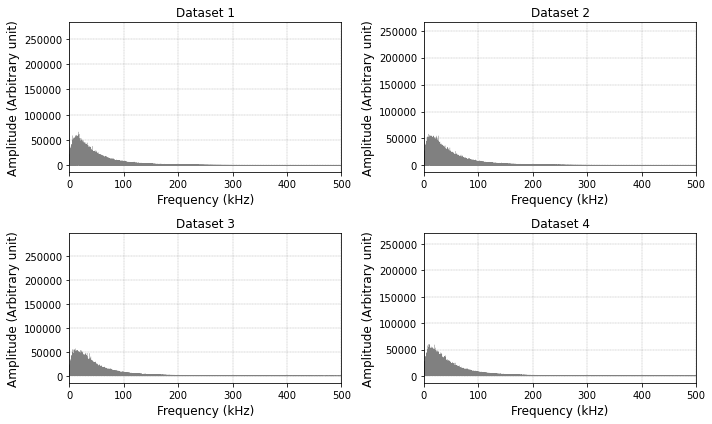

In [21]:
# Function to load and process data
def load_and_process(filepath):
    data = pd.read_csv(filepath, delimiter=";")
    data = data.rename(columns={'# TIME (ns)': 'Time', 'CH1 (V)': 'Value'})
    return data['Time'], data['Value']

# Function to compute FFT and return positive frequencies and their magnitudes
def compute_fft(value, sampling_rate):
    fft_result = np.fft.fft(value)
    delta_t = 1 / sampling_rate
    frequencies = np.fft.fftfreq(len(fft_result), delta_t) * 1e-3
    nyquist_freq = sampling_rate / 2
    positive_frequencies = frequencies[:len(frequencies)//2]
    fft_magnitude = np.abs(fft_result)[:len(frequencies)//2]
    return positive_frequencies, fft_magnitude, nyquist_freq * 1e-3

# Paths to the dataset files
filepaths = [
    "/Users/goldenswan/Desktop/Thesis/Data/Z2_no_lowpassfilter/1.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z2_no_lowpassfilter/2.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z2_no_lowpassfilter/3.csv",
    "/Users/goldenswan/Desktop/Thesis/Data/Z2_no_lowpassfilter/4.csv"
]

# Plotting all datasets in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

for i, ax in enumerate(axs.flat):
    time, value = load_and_process(filepaths[i])
    frequencies, magnitude, nyquist_khz = compute_fft(value, 1e6)
    ax.plot(frequencies, magnitude, linewidth=0.25, color = "grey")
    ax.set_title(f'Dataset {i+1}', fontsize = 12)
    ax.set_xlabel('Frequency (kHz)', fontsize = 12)
    ax.set_ylabel('Amplitude (Arbitrary unit)', fontsize = 12)
    ax.grid(True, linestyle='--', linewidth=0.3, color='gray')
    ax.set_xlim([0, nyquist_khz])

plt.tight_layout()

plt.savefig('/Users/goldenswan/Desktop/Thesis/Data/Plots/FFT/Z2_no_lp.png')
plt.show()
